# DECISION TREE

# Theoratical Part

We are going to solve a classification problem using decision tree algorithm.

When we have a dataset like this:

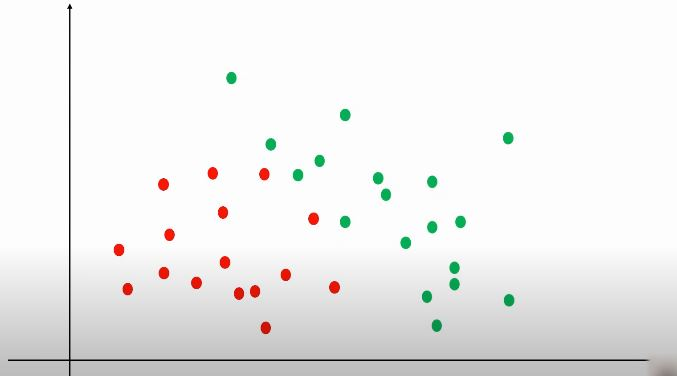.

Then it is easier to draw a decision boundary using logistic regression like:

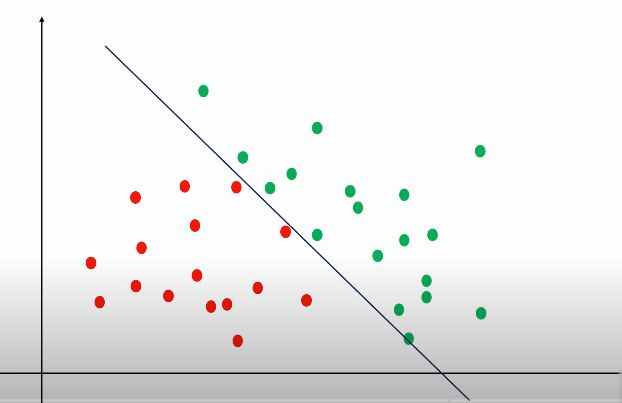.

But if your dataset is little complex, then we cannot just draw a single line, we might have to split the dataset again and again to come up with the decision boundaries and this is what decision tree algorithm does as shown in figure:

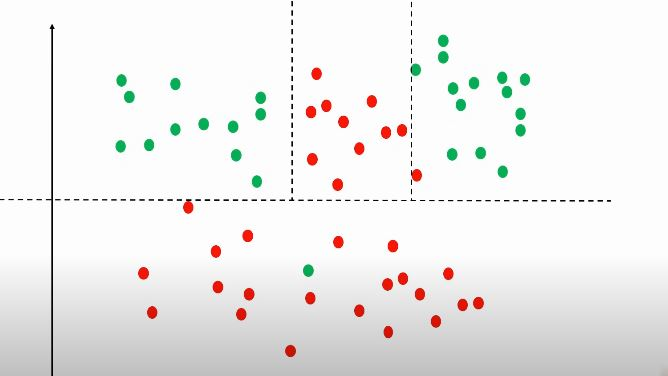.

We will use this particular data set as shown:

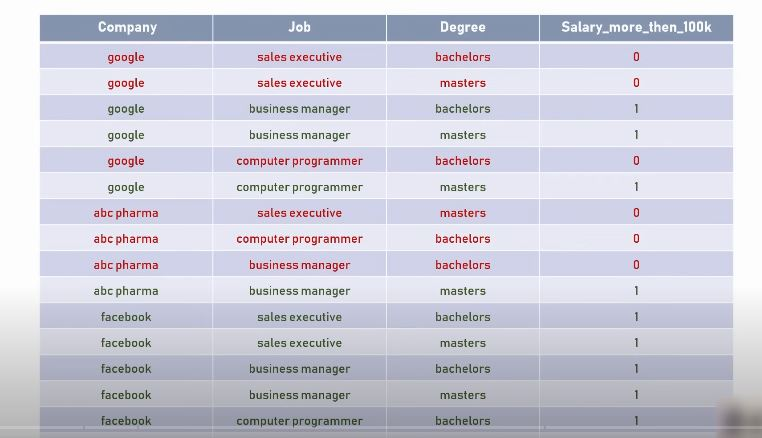.

Where we try to predict if persons salary is more than 100 thousands dollar based on his compant job title and the degree that he has.

Now if we loook at the dataset and when you give it to any person to solve this problem, they will naturally try to build a decision tree in a brain So first you will split the dataset using the company as shown:

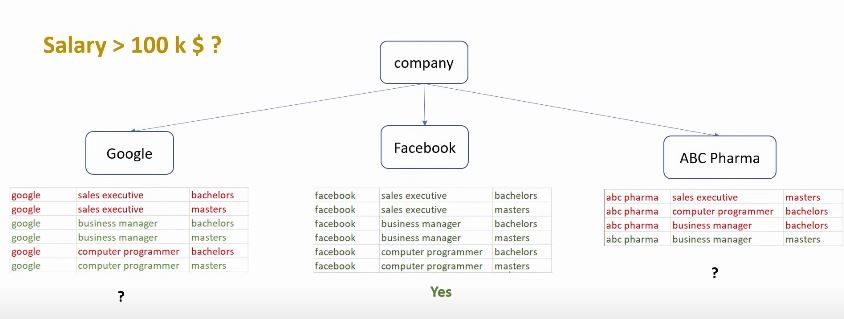.

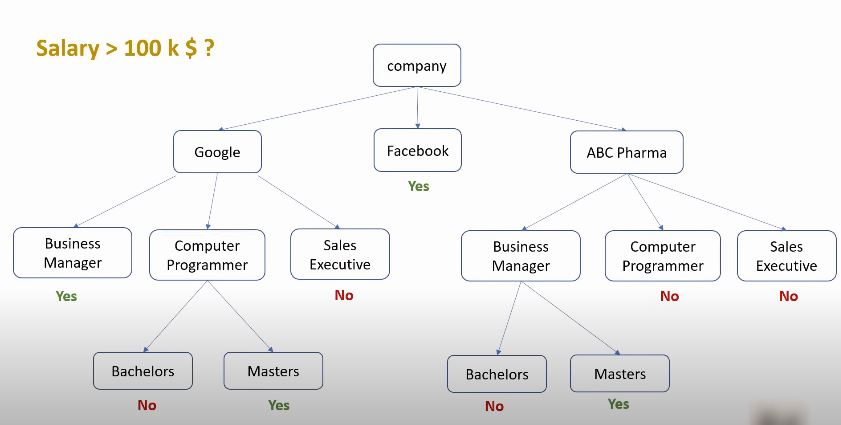

We selected first company than job title etc to come up with solution, it's everyone choice you can do it by your own

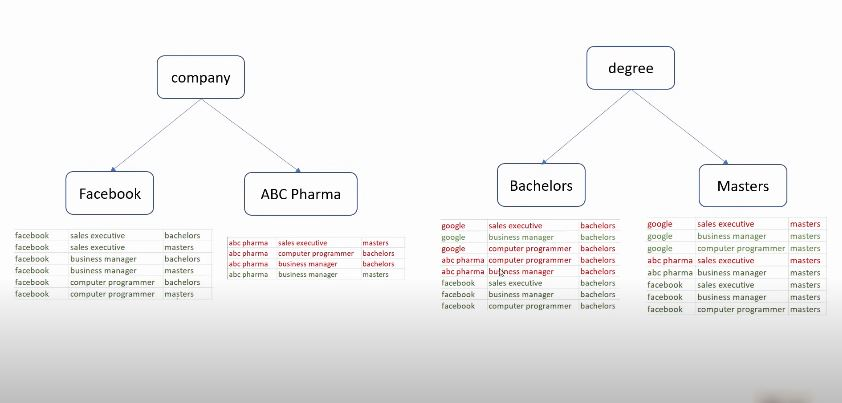

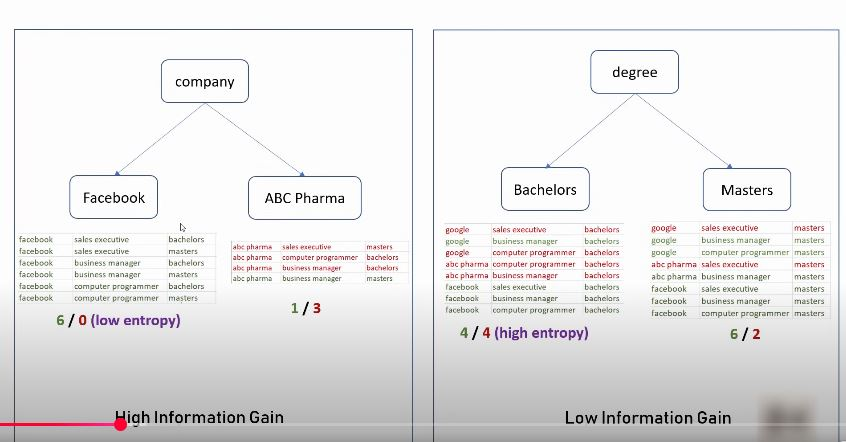

**Entropy means randomness**

By using company first attribute we can gain more information because of lower entropy but if we use degree first then the information will be less and there will be higher entropy. So we must always choose an approach that gives us more information

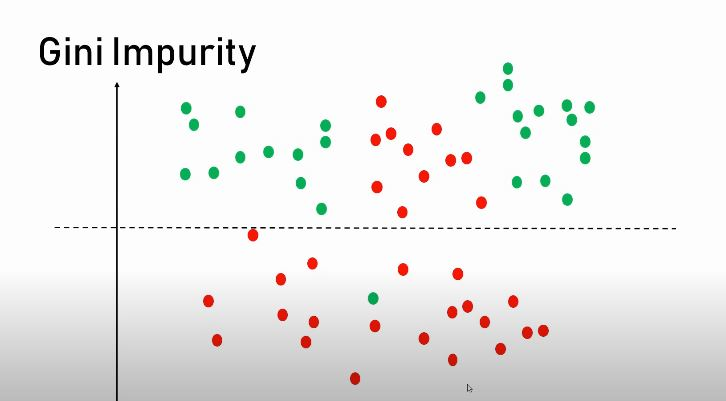

**Gini Impurity** is nothing but an impurity in our dataset for example when we split our sample like as shown in figure, so at the bottom most of the samples are red whereas one is green so this side of sample is almost pure but there is a little impurity, it is sort of similar to entropy.

# Coding part

In [2]:
import pandas as pd
df = pd.read_csv('09_salaries.csv')
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [3]:
inputs = df.drop('salary_more_then_100k',axis='columns')
target = df['salary_more_then_100k']

In [5]:
inputs.head()

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors


In [7]:
target.head()

0    0
1    0
2    1
3    1
4    0
Name: salary_more_then_100k, dtype: int64

Machine learning models can only work on numbers or binaries and they dont understand labels. So we have to convert the labels into numbers by using label encoder

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [10]:
# ['company_n'] a method to create a new column
inputs['company_n'] = le_company.fit_transform(inputs['company'])
inputs['job_n'] = le_job.fit_transform(inputs['job'])
inputs['degree_n'] = le_degree.fit_transform(inputs['degree'])

inputs.head()

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0


In [12]:
input_n = inputs.drop(['company','job','degree'], axis = 'columns')

input_n.head()

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0


In [13]:
# Ready to train our classifier

from sklearn import tree

model = tree.DecisionTreeClassifier()

In [14]:
model.fit(input_n,target)

DecisionTreeClassifier()

In [15]:
model.score(input_n,target)

1.0

In [16]:
model.predict([[2,2,1]]) #salary will be less than 100k

C:\Users\hassa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [24]:
model.predict([[0,0,1]]) # salary more than 100k

C:\Users\hassa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])